In this notebook I will try to predict fraud transactions from a given data set. Given that the data is imbalanced, standard metrics for evaluating classification algorithm (such as accuracy) are invalid. I will focus on the following metrics: Sensitivity (true positive rate) and Specificity (true negative rate). Of course, they are dependent on each other, so we want to find optimal trade-off between them. Such trade-off usually depends on the application of the algorithm, and in case of fraud detection I would prefer to see high sensitivity (e.g. given that a transaction is fraud, I want to be able to detect it with high probability).

**IMPORTING LIBRARIES:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

**READING DATASET :**

In [2]:
data=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**NULL VALUES:**

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Thus there are no null values in the dataset.**

**INFORMATION**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**DESCRIPTIVE STATISTICS**

In [6]:
data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.175161e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.369007e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.094852e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344


In [7]:
data.shape

(284807, 31)

**Thus there are 284807 rows and 31 columns.**

In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**FRAUD CASES AND GENUINE CASES**

In [9]:
fraud_cases=len(data[data['Class']==1])

In [10]:
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 492


In [11]:
non_fraud_cases=len(data[data['Class']==0])

In [12]:
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 284315


In [13]:
fraud=data[data['Class']==1]

In [14]:
genuine=data[data['Class']==0]

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

**EDA**

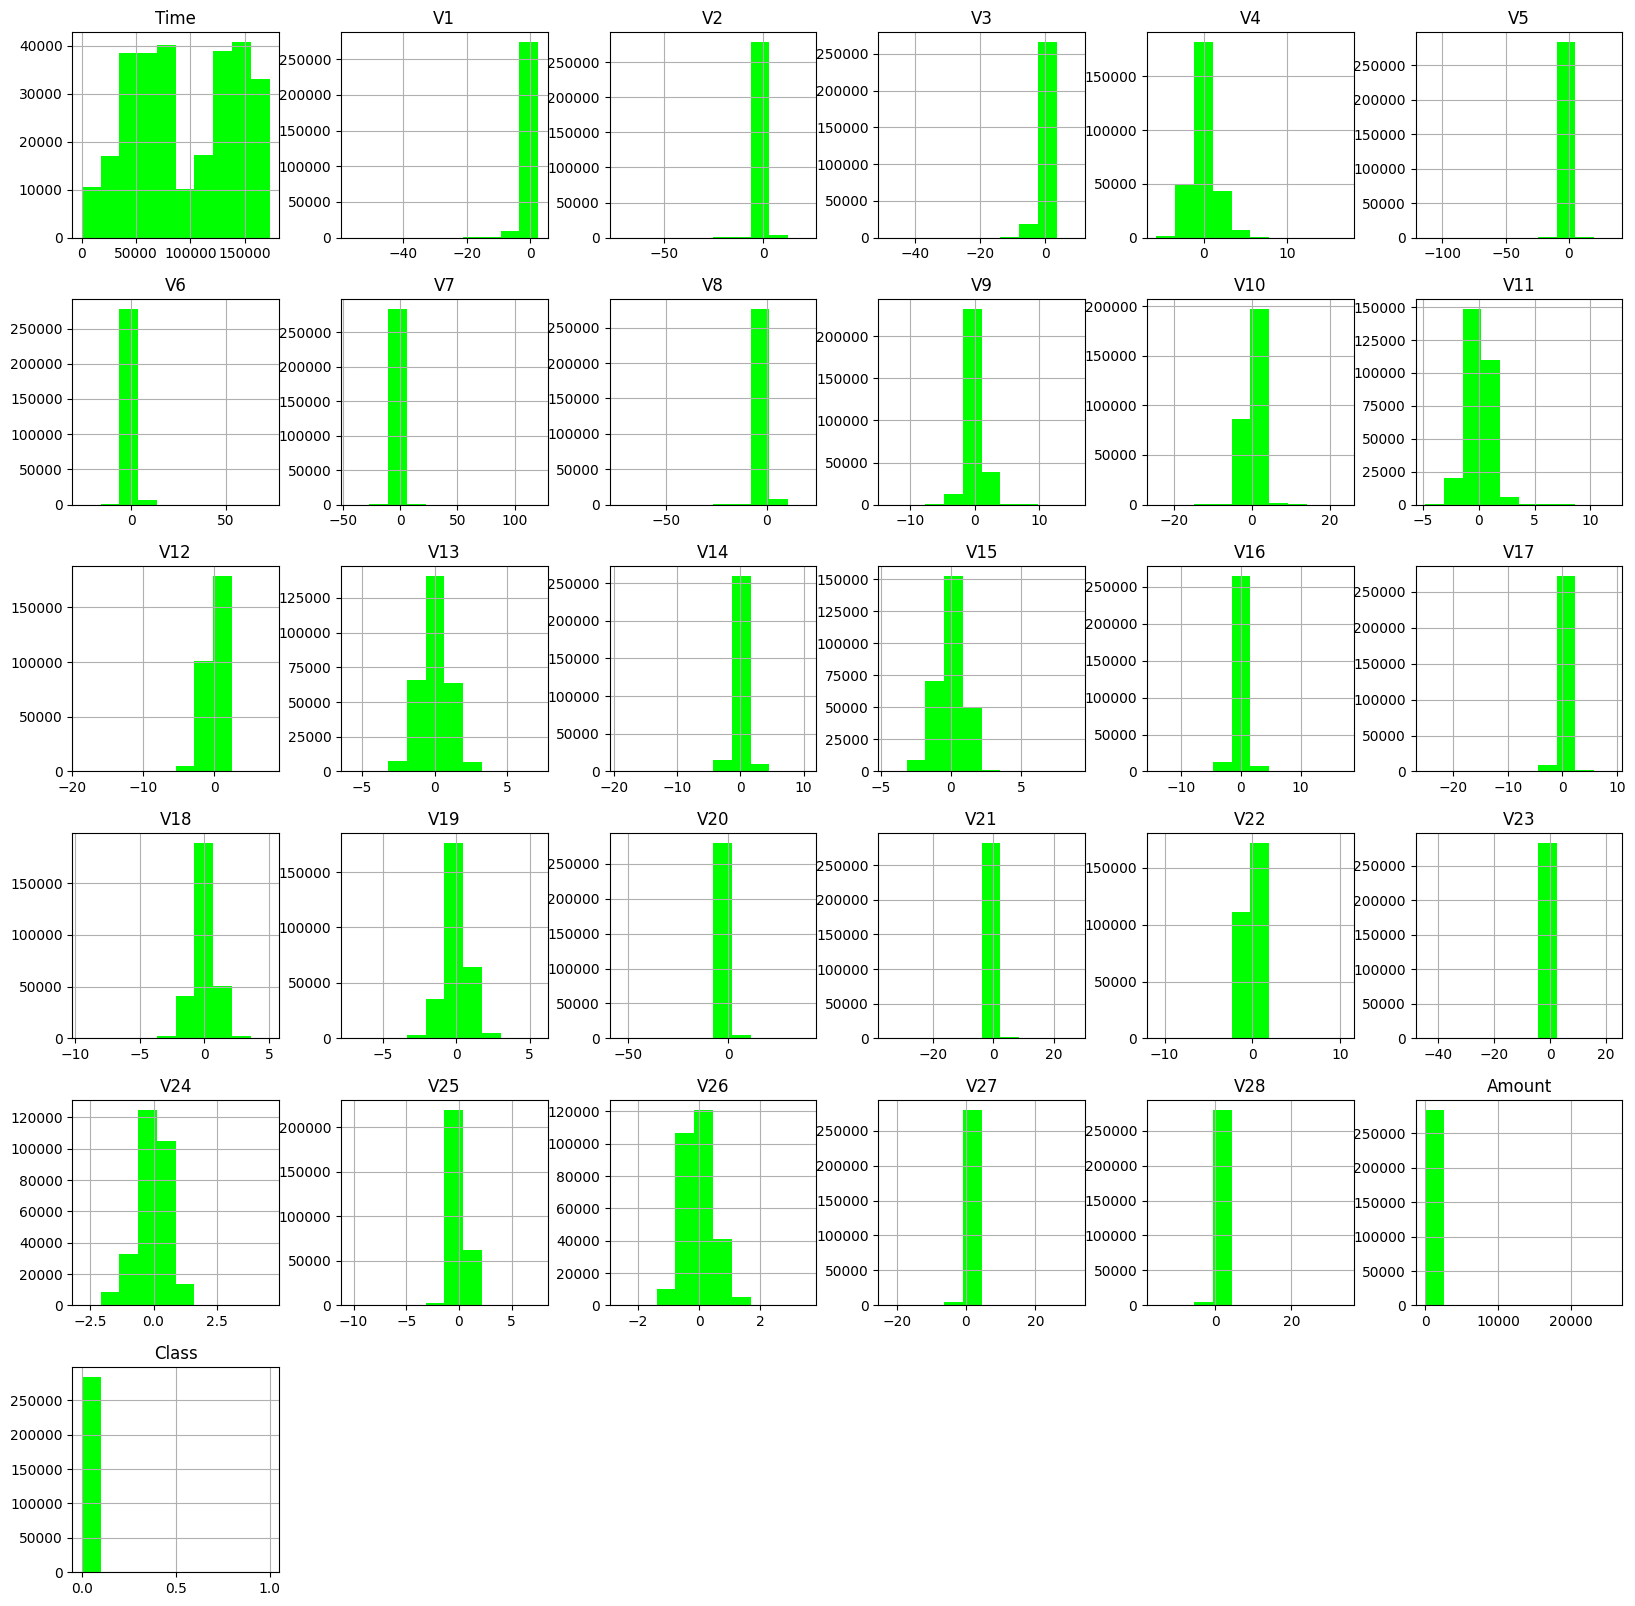

In [17]:
data.hist(figsize=(20,20),color='lime')
plt.show()

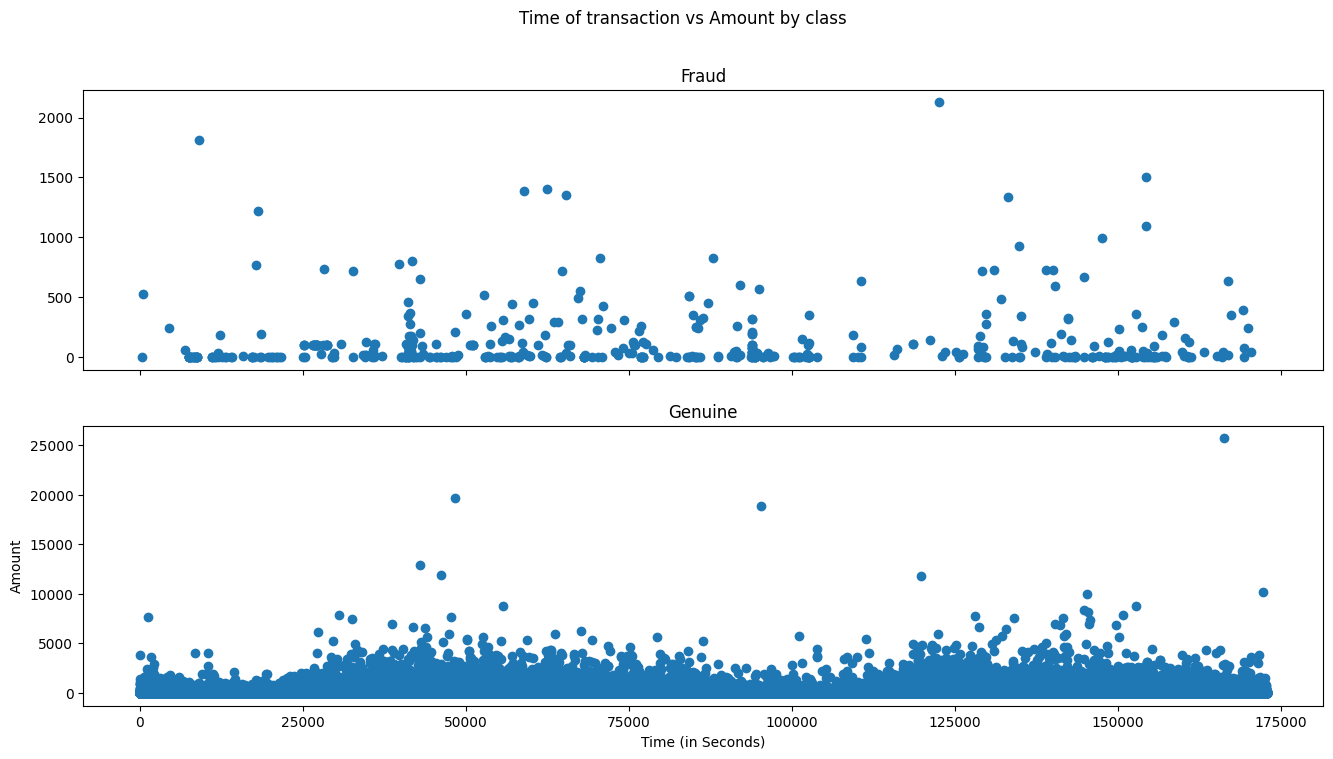

In [18]:
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()


**CORRELATION**

<Axes: >

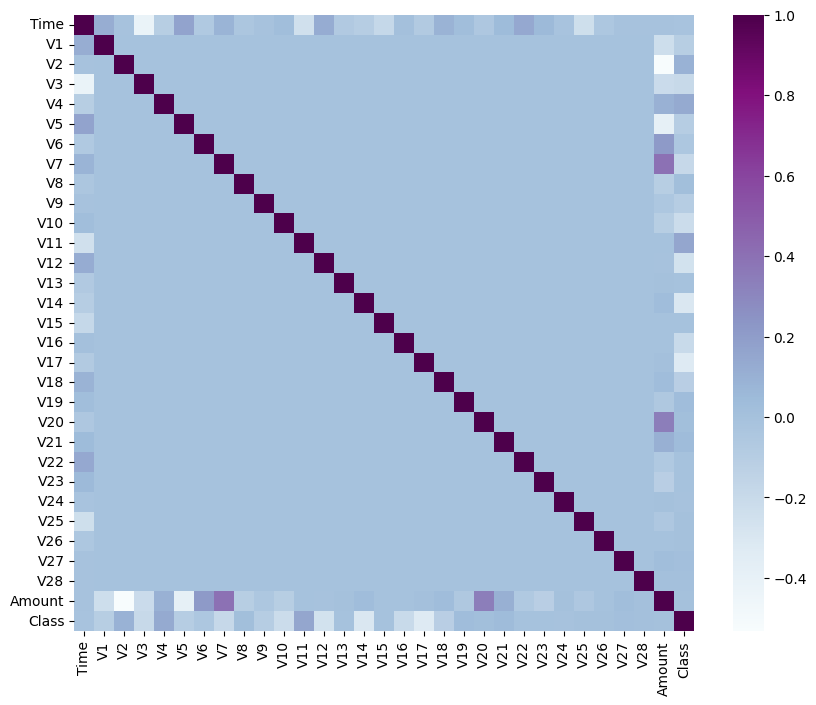

In [19]:
plt.figure(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,cmap='BuPu')

**Let us build our models:**

In [20]:
from sklearn.model_selection import train_test_split

**Model 1:**

In [21]:
X=data.drop(['Class'],axis=1)

In [22]:
y=data['Class']

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc=RandomForestClassifier()

In [26]:
model=rfc.fit(X_train,y_train)

In [27]:
prediction=model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,prediction)

0.9995669627705019

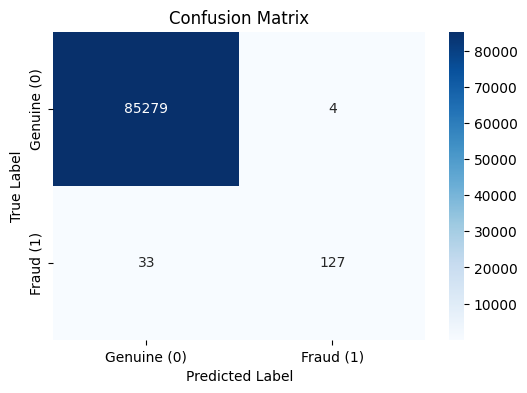

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine (0)', 'Fraud (1)'], yticklabels=['Genuine (0)', 'Fraud (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Model 2:**

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
X1=data.drop(['Class'],axis=1)

In [33]:
y1=data['Class']

In [34]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=123)

In [35]:
lr=LogisticRegression()

In [36]:
model2=lr.fit(X1_train,y1_train)

In [37]:
prediction2=model2.predict(X1_test)

In [38]:
accuracy_score(y1_test,prediction2)

0.9989466661985184

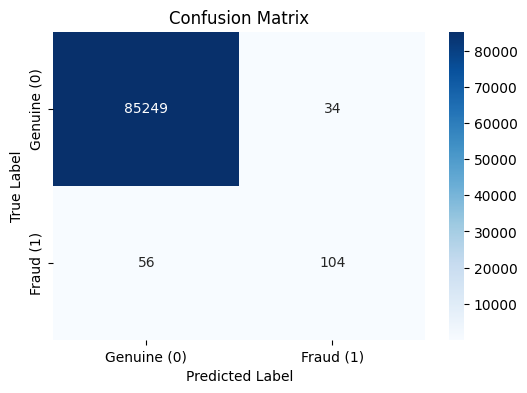

In [39]:
cm = confusion_matrix(y1_test, prediction2)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine (0)', 'Fraud (1)'], yticklabels=['Genuine (0)', 'Fraud (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Model 3:**

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
X2=data.drop(['Class'],axis=1)

In [42]:
y2=data['Class']

In [43]:
dt=DecisionTreeRegressor()

In [44]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=123)

In [45]:
model3=dt.fit(X2_train,y2_train)

In [46]:
prediction3=model3.predict(X2_test)

In [47]:
accuracy_score(y2_test,prediction3)

0.99916903666772

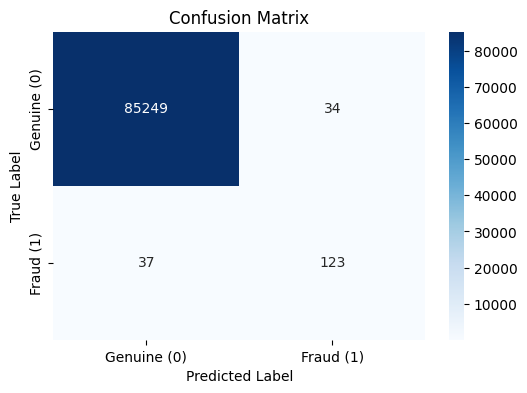

In [48]:
cm = confusion_matrix(y2_test, prediction3)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine (0)', 'Fraud (1)'], yticklabels=['Genuine (0)', 'Fraud (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**All of our models performed with a very high accuracy.**

## Using Reinforcement Learning for Fraud Detection

Yes, Reinforcement Learning (RL) can be employed to solve the problem of credit card fraud detection.

Here's a general idea of how it could be approached:

*   **Agent:** The RL agent would be the model making decisions about whether a transaction is fraudulent or not.
*   **Environment:** The stream of incoming credit card transactions.
*   **State:** The features of a current transaction (e.g., amount, time, location, historical transaction patterns of the user).
*   **Actions:** The agent can decide to classify a transaction as 'fraudulent' or 'genuine'.
*   **Reward/Penalty:**
    *   **Reward:** Correctly identifying a fraudulent transaction or correctly identifying a genuine transaction.
    *   **Penalty:** Incorrectly classifying a genuine transaction as fraud (false positive) or failing to detect a fraudulent transaction (false negative). The penalties for false negatives are typically much higher in fraud detection.

The agent learns a policy (a way of behaving) by interacting with the transaction data. It tries to maximize its cumulative reward over time. This often involves an online learning approach where the model adapts as new transactions and feedback (e.g., chargebacks, user reports) become available.

RL can be particularly useful in scenarios where:

*   Fraud patterns evolve rapidly, requiring the model to adapt quickly.
*   There's a need to balance the detection of fraud with minimizing inconvenience to legitimate users (false positives).
*   The cost of misclassification varies significantly (e.g., missing a large fraudulent transaction is much worse than a small one).

However, implementing RL for fraud detection can be complex due to challenges like:

*   **Delayed Rewards:** It might take time to confirm if a transaction was truly fraudulent.
*   **Exploration vs. Exploitation:** The agent needs to explore new patterns while exploiting known ones.
*   **Highly Imbalanced Data:** Fraudulent transactions are rare, which can make learning difficult.

## Reinforcement Learning Approach: Contextual Bandits (LinUCB)

We will now explore a Reinforcement Learning (RL) technique called **Contextual Bandits** to address the fraud detection problem. Specifically, we'll implement the **LinUCB (Linear Upper Confidence Bound)** algorithm.

In this framework:
*   **Agent**: The LinUCB algorithm itself, which decides whether to classify a transaction as fraudulent or genuine.
*   **Context (State)**: The features of each transaction (e.g., scaled 'Time', 'Amount', and V1-V28 components).
*   **Actions**: Two possible actions:
    *   Action 0: Classify the transaction as genuine.
    *   Action 1: Classify the transaction as fraudulent.
*   **Reward**: The agent receives a reward based on the correctness of its action. The reward structure is designed to heavily penalize missed frauds (False Negatives) and also penalize false alarms (False Positives), while rewarding correct classifications.

LinUCB is suitable here because it can leverage the transaction features (context) to make informed decisions and balances exploration (trying out actions to learn more) with exploitation (choosing the action believed to be best). We will train the agent on the training set and then evaluate its performance on the test set.

In [49]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare data for RL (LinUCB)
# Use copies to avoid altering dataframes used by previous models
X_train_rl = X_train.copy()
X_test_rl = X_test.copy()
y_train_rl = y_train.copy().values # Convert to numpy array
y_test_rl = y_test.copy().values  # Convert to numpy array

# Scale the features
# The V1-V28 features are already PCA components, but Time and Amount need scaling.
# For simplicity and robustness with LinUCB, we'll scale all features.
scaler = StandardScaler()
X_train_scaled_rl = scaler.fit_transform(X_train_rl)
X_test_scaled_rl = scaler.transform(X_test_rl)

# Add a bias term (intercept) to the feature vectors for LinUCB
X_train_scaled_rl = np.concatenate((np.ones((X_train_scaled_rl.shape[0], 1)), X_train_scaled_rl), axis=1)
X_test_scaled_rl = np.concatenate((np.ones((X_test_scaled_rl.shape[0], 1)), X_test_scaled_rl), axis=1)

print("Shape of scaled training features with bias:", X_train_scaled_rl.shape)
print("Shape of scaled test features with bias:", X_test_scaled_rl.shape)

Shape of scaled training features with bias: (199364, 31)
Shape of scaled test features with bias: (85443, 31)


In [50]:
class LinUCBAgent:
    def __init__(self, n_actions, n_features, alpha=1.0):
        self.n_actions = n_actions
        self.n_features = n_features
        self.alpha = alpha

        # Initialize A as a list of identity matrices (one for each action)
        # A stores X.T * X for each arm
        self.A = [np.identity(n_features) for _ in range(n_actions)]
        # Initialize b as a list of zero vectors (one for each action)
        # b stores X.T * r for each arm
        self.b = [np.zeros(n_features) for _ in range(n_actions)]
        
        self.theta = [np.zeros(n_features) for _ in range(n_actions)]

    def predict(self, context):
        # context is a d-dimensional feature vector
        ucb_scores = np.zeros(self.n_actions)
        for action in range(self.n_actions):
            A_inv = np.linalg.inv(self.A[action])
            self.theta[action] = A_inv @ self.b[action] # theta = A_inv * b
            
            # UCB calculation: theta.T * x + alpha * sqrt(x.T * A_inv * x)
            term1 = self.theta[action] @ context
            term2 = self.alpha * np.sqrt(context @ A_inv @ context)
            ucb_scores[action] = term1 + term2
        
        # Choose action with the highest UCB score
        chosen_action = np.argmax(ucb_scores)
        return chosen_action

    def update(self, action, context, reward):
        # Update A and b for the chosen action
        # context is (d,)
        # A_a = A_a + x_t * x_t.T
        # b_a = b_a + r_t * x_t
        self.A[action] += np.outer(context, context) # outer product for x * x.T
        self.b[action] += reward * context

# Example instantiation (parameters will be set during training)
# agent_linucb = LinUCBAgent(n_actions=2, n_features=X_train_scaled_rl.shape[1], alpha=1.0)
# print("LinUCB agent initialized.")

In [51]:
def get_reward_fraud(predicted_action, true_label):
    """
    Defines the reward structure for fraud detection.
    Actions: 0 for genuine, 1 for fraud.
    """
    if predicted_action == 1: # Predicted Fraud
        if true_label == 1: # True Positive
            return 10  # Correctly detected fraud
        else: # False Positive
            return -5 # Incorrectly flagged genuine as fraud
    else: # Predicted Genuine
        if true_label == 0: # True Negative
            return 1   # Correctly identified genuine
        else: # False Negative
            return -100 # Missed a fraud - high penalty
    
# Initialize LinUCB agent
n_actions = 2 # 0 for genuine, 1 for fraud
n_features = X_train_scaled_rl.shape[1] # Number of features including bias
alpha_value = 0.1 # Exploration parameter (can be tuned)

agent_linucb = LinUCBAgent(n_actions=n_actions, n_features=n_features, alpha=alpha_value)

# "Train" the LinUCB agent on the training data
# This involves iterating through the training set and updating the agent's parameters
cumulative_reward_train = 0
train_predictions_rl = []

print(f"Starting LinUCB training on {X_train_scaled_rl.shape[0]} samples...")
for i in range(X_train_scaled_rl.shape[0]):
    context = X_train_scaled_rl[i]
    true_label = y_train_rl[i]
    
    action = agent_linucb.predict(context)
    reward = get_reward_fraud(action, true_label)
    
    agent_linucb.update(action, context, reward)
    
    cumulative_reward_train += reward
    train_predictions_rl.append(action)
    
    if (i + 1) % 20000 == 0:
        print(f"Processed {i+1}/{X_train_scaled_rl.shape[0]} training samples. Cumulative reward: {cumulative_reward_train}")

print(f"LinUCB training completed. Total cumulative reward on training set: {cumulative_reward_train}")

Starting LinUCB training on 199364 samples...
Processed 20000/199364 training samples. Cumulative reward: 19150
Processed 40000/199364 training samples. Cumulative reward: 38955
Processed 60000/199364 training samples. Cumulative reward: 58746
Processed 80000/199364 training samples. Cumulative reward: 77833
Processed 100000/199364 training samples. Cumulative reward: 97433
Processed 120000/199364 training samples. Cumulative reward: 116855
Processed 140000/199364 training samples. Cumulative reward: 136260
Processed 160000/199364 training samples. Cumulative reward: 156012
Processed 180000/199364 training samples. Cumulative reward: 175618
LinUCB training completed. Total cumulative reward on training set: 194722


Starting LinUCB evaluation on 85443 samples...
Processed 10000/85443 test samples. Cumulative reward: 9864
Processed 20000/85443 test samples. Cumulative reward: 19413
Processed 30000/85443 test samples. Cumulative reward: 29298
Processed 40000/85443 test samples. Cumulative reward: 39094
Processed 50000/85443 test samples. Cumulative reward: 49042
Processed 60000/85443 test samples. Cumulative reward: 58618
Processed 70000/85443 test samples. Cumulative reward: 68340
Processed 80000/85443 test samples. Cumulative reward: 78254
LinUCB evaluation completed. Total cumulative reward on test set: 83605

LinUCB - Accuracy on Test Set: 0.9987

LinUCB - Classification Report on Test Set:
              precision    recall  f1-score   support

 Genuine (0)     0.9997    0.9990    0.9993     85283
   Fraud (1)     0.6054    0.8438    0.7050       160

    accuracy                         0.9987     85443
   macro avg     0.8025    0.9214    0.8521     85443
weighted avg     0.9990    0.9987    0

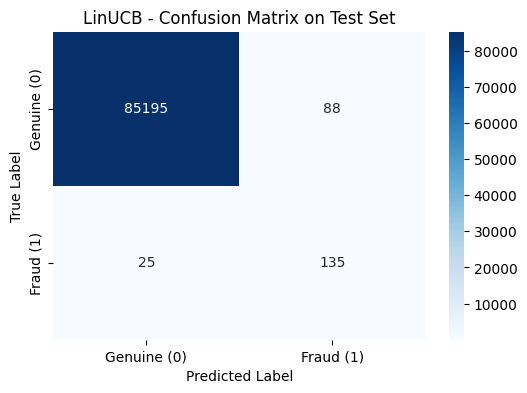

In [52]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Evaluate the trained LinUCB agent on the test set
test_predictions_rl = []
cumulative_reward_test = 0

print(f"Starting LinUCB evaluation on {X_test_scaled_rl.shape[0]} samples...")
for i in range(X_test_scaled_rl.shape[0]):
    context = X_test_scaled_rl[i]
    true_label = y_test_rl[i] # Actual label from the test set
    
    # Get action from the trained agent (exploitation based on learned A and b)
    action = agent_linucb.predict(context) 
    reward = get_reward_fraud(action, true_label) # Calculate reward based on actual label
    
    test_predictions_rl.append(action)
    cumulative_reward_test += reward
    
    if (i + 1) % 10000 == 0:
        print(f"Processed {i+1}/{X_test_scaled_rl.shape[0]} test samples. Cumulative reward: {cumulative_reward_test}")

print(f"LinUCB evaluation completed. Total cumulative reward on test set: {cumulative_reward_test}")

# Calculate and print evaluation metrics
accuracy_rl = accuracy_score(y_test_rl, test_predictions_rl)
print(f"\nLinUCB - Accuracy on Test Set: {accuracy_rl:.4f}")

print("\nLinUCB - Classification Report on Test Set:")
# Note: target_names=['Genuine (0)', 'Fraud (1)']
print(classification_report(y_test_rl, test_predictions_rl, target_names=['Genuine (0)', 'Fraud (1)'], digits=4))

print("\nLinUCB - Confusion Matrix on Test Set:")
cm_rl = confusion_matrix(y_test_rl, test_predictions_rl)
print(cm_rl)

# Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_rl, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine (0)', 'Fraud (1)'], yticklabels=['Genuine (0)', 'Fraud (1)'])
plt.title('LinUCB - Confusion Matrix on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Discussion of LinUCB Results

The LinUCB model's performance can now be assessed based on the metrics above.

*   **Cumulative Reward**: This gives an overall sense of how well the agent performed according to our defined reward structure.
*   **Accuracy**: While high accuracy is common in imbalanced datasets, it's not the primary metric for fraud detection.
*   **Precision, Recall, F1-Score (for Fraud class)**: These are critical.
    *   **Recall (Sensitivity)** for the 'Fraud (1)' class tells us what proportion of actual frauds the model correctly identified. This is very important as missing frauds (False Negatives) is costly.
    *   **Precision** for the 'Fraud (1)' class tells us what proportion of transactions flagged as fraud were actually fraudulent. Low precision means many false alarms (False Positives).
*   **Confusion Matrix**: Provides a detailed breakdown of True Positives, True Negatives, False Positives, and False Negatives.

Compare these results to the supervised learning models (Random Forest, Logistic Regression, Decision Tree). The LinUCB approach might offer different trade-offs, especially if the reward function accurately reflects the real-world costs and benefits.

**Limitations & Potential Improvements:**
*   **Alpha Parameter**: The `alpha` value in LinUCB controls the exploration-exploitation balance. This was set to 0.1 but could be tuned for better performance.
*   **Reward Structure**: The defined rewards are heuristic. Fine-tuning them can significantly impact the agent's behavior.
*   **Static Dataset**: RL agents typically learn best in interactive environments. Here, we simulate this by processing a static dataset sequentially.
*   **Feature Engineering**: More sophisticated feature engineering could improve performance.
*   **Non-stationarity**: If fraud patterns change over time (which they do in reality), the LinUCB model (or any model) would need to be retrained or adapted. Online learning capabilities of bandits are beneficial here.

This implementation provides a foundational example of applying a contextual bandit algorithm to fraud detection.

## Additional Classical RL Approaches for Fraud Detection

While we've implemented the LinUCB algorithm (a contextual bandit approach), there are several other classical RL algorithms that could be applied to the credit card fraud detection problem:

### 1. Q-Learning
**How it could be applied:**
* **States:** The feature vectors of transactions
* **Actions:** Classify as genuine (0) or fraud (1)
* **Rewards:** Similar to our current reward structure
* **Implementation approach:** Since the state space is large (continuous), function approximation would be required, such as using a linear function or neural network to represent the Q-function

### 2. SARSA (State-Action-Reward-State-Action)
**How it could be applied:**
* Similar to Q-learning but uses an on-policy approach
* More conservative than Q-learning, which might be beneficial in fraud detection where false positives can be costly
* Could provide a different balance of precision vs. recall

### 3. Actor-Critic Methods
**How it could be applied:**
* **Actor:** Policy network that decides whether to classify a transaction as fraud or genuine
* **Critic:** Value network that evaluates how good the actor's decisions are
* Can better handle the exploration-exploitation trade-off in this imbalanced dataset
* Can incorporate a cost-sensitive learning approach directly into the reward structure

### 4. Thompson Sampling
**How it could be applied:**
* An alternative to UCB for the multi-armed bandit/contextual bandit approach
* Bayesian approach that maintains a distribution over expected rewards
* May handle uncertainty better in cases where fraud patterns are changing

### 5. Deep Q-Network (DQN)
**How it could be applied:**
* Uses deep neural networks to approximate the Q-function
* Can capture complex non-linear relationships in the transaction features
* Memory replay could help with the class imbalance problem by storing and reusing fraud examples

### 6. Policy Gradient Methods
**How it could be applied:**
* Directly learn the policy without the intermediate step of learning a value function
* Can incorporate risk sensitivity more directly
* Methods like REINFORCE or Proximal Policy Optimization (PPO) could be used

To implement any of these algorithms, additional preprocessing steps might be needed. For example, discretizing the continuous state space or using function approximation to handle the large state space. The reward structure could also be further refined to better reflect the business goals of fraud detection, such as incorporating the actual monetary value of transactions into the reward calculation.

## Let's Implement and Compare These RL Algorithms

We'll now implement several of these RL algorithms and compare their performances on the credit card fraud detection task. For each algorithm, we'll:
1. Prepare the data as needed
2. Implement the algorithm
3. Train it on the same training set
4. Evaluate it on the same test set
5. Compare the results in terms of accuracy, precision, recall, F1-score, and cumulative reward

### 1. Q-Learning with Function Approximation

Since our state space (transaction features) is continuous, we'll use linear function approximation for our Q-learning implementation. This will allow us to estimate the Q-value for each action given the transaction features.

In [53]:
# Q-Learning with linear function approximation
class LinearQAgent:
    def __init__(self, n_features, n_actions, alpha=0.01, gamma=0.95, epsilon=0.1):
        """
        Q-Learning agent with linear function approximation
        - n_features: number of features (state dimensions)
        - n_actions: number of possible actions (2 for fraud detection)
        - alpha: learning rate
        - gamma: discount factor
        - epsilon: exploration rate
        """
        self.n_features = n_features
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        
        # Initialize weights for linear approximation of Q-values
        # For each action, we have a set of weights (one per feature)
        self.weights = np.zeros((n_actions, n_features))
    
    def get_q_value(self, state, action):
        """
        Calculate Q(s,a) = w_a^T * state
        """
        return np.dot(self.weights[action], state)
    
    def get_action(self, state, explore=True):
        """
        Choose action using epsilon-greedy policy
        """
        if explore and np.random.random() < self.epsilon:
            return np.random.randint(0, self.n_actions)  # Explore
        else:
            # Exploit: choose action with highest Q-value
            q_values = np.array([self.get_q_value(state, a) for a in range(self.n_actions)])
            return np.argmax(q_values)
    
    def update(self, state, action, reward, next_state):
        """
        Update weights using Q-learning update rule
        """
        # Calculate current Q-value: Q(s,a) = w_a^T * state
        current_q = self.get_q_value(state, action)
        
        # Calculate maximum next Q-value: max_a' Q(s',a')
        next_q_values = np.array([self.get_q_value(next_state, a) for a in range(self.n_actions)])
        max_next_q = np.max(next_q_values)
        
        # TD target: r + gamma * max_a' Q(s',a')
        target = reward + self.gamma * max_next_q
        
        # TD error: target - Q(s,a)
        td_error = target - current_q
        
        # Update weights: w_a = w_a + alpha * td_error * state
        self.weights[action] += self.alpha * td_error * state

In [54]:
# Initialize Q-learning agent
q_agent = LinearQAgent(n_features=X_train_scaled_rl.shape[1],
                    n_actions=2,
                    alpha=0.01,  # Learning rate
                    gamma=0.99,  # Discount factor
                    epsilon=0.1)  # Exploration rate

# Track metrics
cumulative_reward_q_train = 0
train_predictions_q = []

print("Starting Q-learning training...")
# For fraud detection with offline data, we simulate an "episode" as going through all transactions
for i in range(X_train_scaled_rl.shape[0]):
    state = X_train_scaled_rl[i]
    true_label = y_train_rl[i]
    
    # Choose action (predict fraud or genuine)
    action = q_agent.get_action(state)
    
    # Get reward based on action
    reward = get_reward_fraud(action, true_label)
    
    # For the "next state", we'll use either the next transaction or a zero vector if it's the last one
    next_state = X_train_scaled_rl[i+1] if i < X_train_scaled_rl.shape[0] - 1 else np.zeros_like(state)
    
    # Update Q-function
    q_agent.update(state, action, reward, next_state)
    
    # Track metrics
    cumulative_reward_q_train += reward
    train_predictions_q.append(action)
    
    if (i + 1) % 20000 == 0:
        print(f"Processed {i+1}/{X_train_scaled_rl.shape[0]} training samples. Cumulative reward: {cumulative_reward_q_train}")

print(f"Q-learning training completed. Total cumulative reward on training set: {cumulative_reward_q_train}")

Starting Q-learning training...
Processed 20000/199364 training samples. Cumulative reward: -40694
Processed 40000/199364 training samples. Cumulative reward: -85747
Processed 60000/199364 training samples. Cumulative reward: -124248
Processed 80000/199364 training samples. Cumulative reward: -166631
Processed 100000/199364 training samples. Cumulative reward: -214493
Processed 120000/199364 training samples. Cumulative reward: -249467
Processed 140000/199364 training samples. Cumulative reward: -297292
Processed 160000/199364 training samples. Cumulative reward: -337612
Processed 180000/199364 training samples. Cumulative reward: -384530
Q-learning training completed. Total cumulative reward on training set: -431490


Starting Q-learning evaluation...
Processed 10000/85443 test samples. Cumulative reward: 2660
Processed 20000/85443 test samples. Cumulative reward: 4145
Processed 30000/85443 test samples. Cumulative reward: 6618
Processed 40000/85443 test samples. Cumulative reward: 8540
Processed 50000/85443 test samples. Cumulative reward: 10698
Processed 60000/85443 test samples. Cumulative reward: 12994
Processed 70000/85443 test samples. Cumulative reward: 15402
Processed 80000/85443 test samples. Cumulative reward: 17736
Q-learning evaluation completed. Total cumulative reward on test set: 19011

Q-Learning - Accuracy on Test Set: 0.8737

Q-Learning - Classification Report on Test Set:
              precision    recall  f1-score   support

 Genuine (0)     0.9996    0.8738    0.9325     85283
   Fraud (1)     0.0119    0.8125    0.0235       160

    accuracy                         0.8737     85443
   macro avg     0.5058    0.8432    0.4780     85443
weighted avg     0.9977    0.8737    0.930

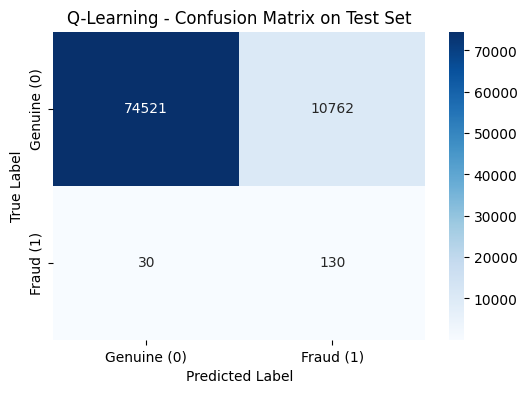

In [55]:
# Evaluate Q-learning on test set
test_predictions_q = []
cumulative_reward_q_test = 0

print("Starting Q-learning evaluation...")
for i in range(X_test_scaled_rl.shape[0]):
    state = X_test_scaled_rl[i]
    true_label = y_test_rl[i]
    
    # Choose best action (no exploration during testing)
    action = q_agent.get_action(state, explore=False)
    
    # Get reward
    reward = get_reward_fraud(action, true_label)
    
    # Track metrics
    test_predictions_q.append(action)
    cumulative_reward_q_test += reward
    
    if (i + 1) % 10000 == 0:
        print(f"Processed {i+1}/{X_test_scaled_rl.shape[0]} test samples. Cumulative reward: {cumulative_reward_q_test}")

print(f"Q-learning evaluation completed. Total cumulative reward on test set: {cumulative_reward_q_test}")

# Calculate and print evaluation metrics
accuracy_q = accuracy_score(y_test_rl, test_predictions_q)
print(f"\nQ-Learning - Accuracy on Test Set: {accuracy_q:.4f}")

print("\nQ-Learning - Classification Report on Test Set:")
print(classification_report(y_test_rl, test_predictions_q, target_names=['Genuine (0)', 'Fraud (1)'], digits=4))

print("\nQ-Learning - Confusion Matrix on Test Set:")
cm_q = confusion_matrix(y_test_rl, test_predictions_q)
print(cm_q)

# Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_q, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine (0)', 'Fraud (1)'], yticklabels=['Genuine (0)', 'Fraud (1)'])
plt.title('Q-Learning - Confusion Matrix on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 2. SARSA (State-Action-Reward-State-Action)

SARSA is an on-policy RL algorithm, meaning that it learns the value of the policy being followed. This can make it more conservative than Q-learning, which might be beneficial for fraud detection where false positives are costly.

In [56]:
# SARSA with linear function approximation
class LinearSarsaAgent:
    def __init__(self, n_features, n_actions, alpha=0.01, gamma=0.95, epsilon=0.1):
        """
        SARSA agent with linear function approximation
        - n_features: number of features (state dimensions)
        - n_actions: number of possible actions (2 for fraud detection)
        - alpha: learning rate
        - gamma: discount factor
        - epsilon: exploration rate
        """
        self.n_features = n_features
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        
        # Initialize weights for linear approximation of Q-values
        self.weights = np.zeros((n_actions, n_features))
    
    def get_q_value(self, state, action):
        """
        Calculate Q(s,a) = w_a^T * state
        """
        return np.dot(self.weights[action], state)
    
    def get_action(self, state, explore=True):
        """
        Choose action using epsilon-greedy policy
        """
        if explore and np.random.random() < self.epsilon:
            return np.random.randint(0, self.n_actions)  # Explore
        else:
            # Exploit: choose action with highest Q-value
            q_values = np.array([self.get_q_value(state, a) for a in range(self.n_actions)])
            return np.argmax(q_values)
    
    def update(self, state, action, reward, next_state, next_action):
        """
        Update weights using SARSA update rule
        """
        # Calculate current Q-value: Q(s,a)
        current_q = self.get_q_value(state, action)
        
        # Calculate next Q-value: Q(s',a')
        next_q = self.get_q_value(next_state, next_action)
        
        # SARSA target: r + gamma * Q(s',a')
        target = reward + self.gamma * next_q
        
        # TD error
        td_error = target - current_q
        
        # Update weights: w_a = w_a + alpha * td_error * state
        self.weights[action] += self.alpha * td_error * state

In [57]:
# Initialize SARSA agent
sarsa_agent = LinearSarsaAgent(n_features=X_train_scaled_rl.shape[1],
                           n_actions=2,
                           alpha=0.01,  # Learning rate
                           gamma=0.99,  # Discount factor
                           epsilon=0.1)  # Exploration rate

# Track metrics
cumulative_reward_sarsa_train = 0
train_predictions_sarsa = []

print("Starting SARSA training...")
for i in range(X_train_scaled_rl.shape[0]):
    state = X_train_scaled_rl[i]
    true_label = y_train_rl[i]
    
    # Choose action for current state
    action = sarsa_agent.get_action(state)
    
    # Get reward
    reward = get_reward_fraud(action, true_label)
    
    # Get next state
    next_state = X_train_scaled_rl[i+1] if i < X_train_scaled_rl.shape[0] - 1 else np.zeros_like(state)
    
    # Choose action for next state (key difference from Q-learning)
    next_action = sarsa_agent.get_action(next_state)
    
    # Update weights
    sarsa_agent.update(state, action, reward, next_state, next_action)
    
    # Track metrics
    cumulative_reward_sarsa_train += reward
    train_predictions_sarsa.append(action)
    
    if (i + 1) % 20000 == 0:
        print(f"Processed {i+1}/{X_train_scaled_rl.shape[0]} training samples. Cumulative reward: {cumulative_reward_sarsa_train}")

print(f"SARSA training completed. Total cumulative reward on training set: {cumulative_reward_sarsa_train}")

Starting SARSA training...
Processed 20000/199364 training samples. Cumulative reward: -29492
Processed 40000/199364 training samples. Cumulative reward: -66337
Processed 60000/199364 training samples. Cumulative reward: -110868
Processed 80000/199364 training samples. Cumulative reward: -151227
Processed 100000/199364 training samples. Cumulative reward: -188055
Processed 120000/199364 training samples. Cumulative reward: -218335
Processed 140000/199364 training samples. Cumulative reward: -265912
Processed 160000/199364 training samples. Cumulative reward: -311710
Processed 180000/199364 training samples. Cumulative reward: -359134
SARSA training completed. Total cumulative reward on training set: -398266


Starting SARSA evaluation...
Processed 10000/85443 test samples. Cumulative reward: -19642
Processed 20000/85443 test samples. Cumulative reward: -39873
Processed 30000/85443 test samples. Cumulative reward: -60260
Processed 40000/85443 test samples. Cumulative reward: -80102
Processed 50000/85443 test samples. Cumulative reward: -100494
Processed 60000/85443 test samples. Cumulative reward: -121080
Processed 70000/85443 test samples. Cumulative reward: -141510
Processed 80000/85443 test samples. Cumulative reward: -161922
SARSA evaluation completed. Total cumulative reward on test set: -172987

SARSA - Accuracy on Test Set: 0.4990

SARSA - Classification Report on Test Set:
              precision    recall  f1-score   support

 Genuine (0)     0.9993    0.4984    0.6651     85283
   Fraud (1)     0.0031    0.8187    0.0061       160

    accuracy                         0.4990     85443
   macro avg     0.5012    0.6586    0.3356     85443
weighted avg     0.9975    0.4990    0.6638 

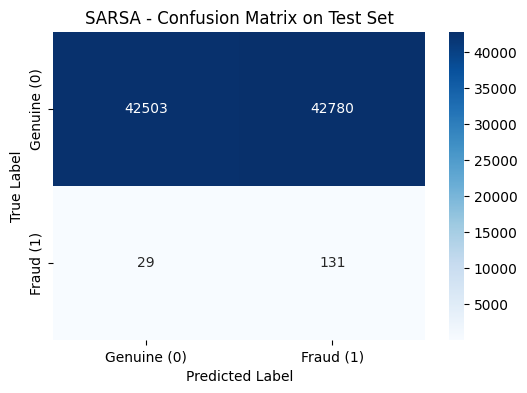

In [58]:
# Evaluate SARSA on test set
test_predictions_sarsa = []
cumulative_reward_sarsa_test = 0

print("Starting SARSA evaluation...")
for i in range(X_test_scaled_rl.shape[0]):
    state = X_test_scaled_rl[i]
    true_label = y_test_rl[i]
    
    # Choose best action (no exploration during testing)
    action = sarsa_agent.get_action(state, explore=False)
    
    # Get reward
    reward = get_reward_fraud(action, true_label)
    
    # Track metrics
    test_predictions_sarsa.append(action)
    cumulative_reward_sarsa_test += reward
    
    if (i + 1) % 10000 == 0:
        print(f"Processed {i+1}/{X_test_scaled_rl.shape[0]} test samples. Cumulative reward: {cumulative_reward_sarsa_test}")

print(f"SARSA evaluation completed. Total cumulative reward on test set: {cumulative_reward_sarsa_test}")

# Calculate and print evaluation metrics
accuracy_sarsa = accuracy_score(y_test_rl, test_predictions_sarsa)
print(f"\nSARSA - Accuracy on Test Set: {accuracy_sarsa:.4f}")

print("\nSARSA - Classification Report on Test Set:")
print(classification_report(y_test_rl, test_predictions_sarsa, target_names=['Genuine (0)', 'Fraud (1)'], digits=4))

print("\nSARSA - Confusion Matrix on Test Set:")
cm_sarsa = confusion_matrix(y_test_rl, test_predictions_sarsa)
print(cm_sarsa)

# Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_sarsa, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine (0)', 'Fraud (1)'], yticklabels=['Genuine (0)', 'Fraud (1)'])
plt.title('SARSA - Confusion Matrix on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 3. Actor-Critic Method

Actor-Critic combines value-based and policy-based methods. It uses two components:
- **Actor**: Makes decisions about which action to take
- **Critic**: Evaluates the quality of the actions (value function)

This method can better handle the exploration-exploitation trade-off and is well-suited for fraud detection.

In [59]:
class LinearActorCriticAgent:
    def __init__(self, n_features, n_actions, actor_alpha=0.01, critic_alpha=0.01, gamma=0.95):
        """
        Actor-Critic agent with linear function approximation
        - n_features: number of features (state dimensions)
        - n_actions: number of possible actions
        - actor_alpha: learning rate for the actor
        - critic_alpha: learning rate for the critic
        - gamma: discount factor
        """
        self.n_features = n_features
        self.n_actions = n_actions
        self.actor_alpha = actor_alpha
        self.critic_alpha = critic_alpha
        self.gamma = gamma
        
        # Actor: policy parameters (linear softmax policy)
        # For each action, we have a set of weights
        self.actor_weights = np.zeros((n_actions, n_features))
        
        # Critic: value function parameters (linear)
        self.critic_weights = np.zeros(n_features)
        
    def get_value(self, state):
        """
        Calculate V(s) = w^T * state
        """
        return np.dot(self.critic_weights, state)
    
    def get_action_probabilities(self, state):
        """
        Calculate softmax policy: π(a|s) = exp(θ_a^T * s) / sum_b(exp(θ_b^T * s))
        """
        # Calculate raw preferences
        preferences = np.array([np.dot(self.actor_weights[a], state) for a in range(self.n_actions)])
        # Apply softmax to get probabilities
        # Use max trick for numerical stability
        preferences -= np.max(preferences)
        exp_prefs = np.exp(preferences)
        probabilities = exp_prefs / np.sum(exp_prefs)
        return probabilities
    
    def get_action(self, state, explore=True):
        """
        Sample action from policy
        """
        if explore:
            # Sample from distribution
            probabilities = self.get_action_probabilities(state)
            action = np.random.choice(self.n_actions, p=probabilities)
            return action
        else:
            # Greedy action selection
            probabilities = self.get_action_probabilities(state)
            return np.argmax(probabilities)
    
    def update(self, state, action, reward, next_state):
        """
        Update actor and critic weights
        """
        # Current value estimate
        current_value = self.get_value(state)
        
        # Next state value estimate
        next_value = self.get_value(next_state)
        
        # TD error: δ = r + γV(s') - V(s)
        td_error = reward + self.gamma * next_value - current_value
        
        # Update critic: w = w + α_critic * δ * state
        self.critic_weights += self.critic_alpha * td_error * state
        
        # Update actor: θ_a = θ_a + α_actor * δ * (∇log(π(a|s)))
        # For linear softmax policy, gradient of log policy for action a is: state - E[state]
        # Here we'll use a simplified approach: increase preference for taken action if TD error is positive
        # This is a simplified version of the policy gradient update
        self.actor_weights[action] += self.actor_alpha * td_error * state

In [60]:
# Initialize Actor-Critic agent
ac_agent = LinearActorCriticAgent(
    n_features=X_train_scaled_rl.shape[1],
    n_actions=2,
    actor_alpha=0.01,   # Actor learning rate
    critic_alpha=0.01,  # Critic learning rate
    gamma=0.99          # Discount factor
)

# Track metrics
cumulative_reward_ac_train = 0
train_predictions_ac = []

print("Starting Actor-Critic training...")
for i in range(X_train_scaled_rl.shape[0]):
    state = X_train_scaled_rl[i]
    true_label = y_train_rl[i]
    
    # Choose action based on policy
    action = ac_agent.get_action(state, explore=True)
    
    # Get reward
    reward = get_reward_fraud(action, true_label)
    
    # Get next state
    next_state = X_train_scaled_rl[i+1] if i < X_train_scaled_rl.shape[0] - 1 else np.zeros_like(state)
    
    # Update actor and critic
    ac_agent.update(state, action, reward, next_state)
    
    # Track metrics
    cumulative_reward_ac_train += reward
    train_predictions_ac.append(action)
    
    if (i + 1) % 20000 == 0:
        print(f"Processed {i+1}/{X_train_scaled_rl.shape[0]} training samples. Cumulative reward: {cumulative_reward_ac_train}")

print(f"Actor-Critic training completed. Total cumulative reward on training set: {cumulative_reward_ac_train}")

Starting Actor-Critic training...
Processed 20000/199364 training samples. Cumulative reward: -26464
Processed 40000/199364 training samples. Cumulative reward: -68351
Processed 60000/199364 training samples. Cumulative reward: -112798
Processed 80000/199364 training samples. Cumulative reward: -151389
Processed 100000/199364 training samples. Cumulative reward: -188261
Processed 120000/199364 training samples. Cumulative reward: -228327
Processed 140000/199364 training samples. Cumulative reward: -260964
Processed 160000/199364 training samples. Cumulative reward: -309540
Processed 180000/199364 training samples. Cumulative reward: -352750
Actor-Critic training completed. Total cumulative reward on training set: -395136


Starting Actor-Critic evaluation...
Processed 10000/85443 test samples. Cumulative reward: -29506
Processed 20000/85443 test samples. Cumulative reward: -59075
Processed 30000/85443 test samples. Cumulative reward: -88592
Processed 40000/85443 test samples. Cumulative reward: -118146
Processed 50000/85443 test samples. Cumulative reward: -148166
Processed 60000/85443 test samples. Cumulative reward: -178100
Processed 70000/85443 test samples. Cumulative reward: -208090
Processed 80000/85443 test samples. Cumulative reward: -236586
Actor-Critic evaluation completed. Total cumulative reward on test set: -251589

Actor-Critic - Accuracy on Test Set: 0.3672

Actor-Critic - Classification Report on Test Set:
              precision    recall  f1-score   support

 Genuine (0)     0.9957    0.3676    0.5369     85283
   Fraud (1)     0.0005    0.1562    0.0009       160

    accuracy                         0.3672     85443
   macro avg     0.4981    0.2619    0.2689     85443
weighted avg   

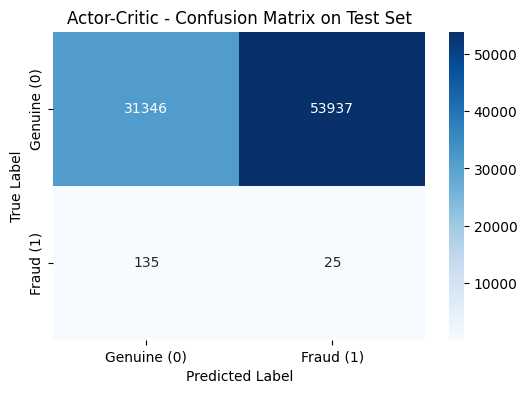

In [61]:
# Evaluate Actor-Critic on test set
test_predictions_ac = []
cumulative_reward_ac_test = 0

print("Starting Actor-Critic evaluation...")
for i in range(X_test_scaled_rl.shape[0]):
    state = X_test_scaled_rl[i]
    true_label = y_test_rl[i]
    
    # Choose best action (no exploration during testing)
    action = ac_agent.get_action(state, explore=False)
    
    # Get reward
    reward = get_reward_fraud(action, true_label)
    
    # Track metrics
    test_predictions_ac.append(action)
    cumulative_reward_ac_test += reward
    
    if (i + 1) % 10000 == 0:
        print(f"Processed {i+1}/{X_test_scaled_rl.shape[0]} test samples. Cumulative reward: {cumulative_reward_ac_test}")

print(f"Actor-Critic evaluation completed. Total cumulative reward on test set: {cumulative_reward_ac_test}")

# Calculate and print evaluation metrics
accuracy_ac = accuracy_score(y_test_rl, test_predictions_ac)
print(f"\nActor-Critic - Accuracy on Test Set: {accuracy_ac:.4f}")

print("\nActor-Critic - Classification Report on Test Set:")
print(classification_report(y_test_rl, test_predictions_ac, target_names=['Genuine (0)', 'Fraud (1)'], digits=4))

print("\nActor-Critic - Confusion Matrix on Test Set:")
cm_ac = confusion_matrix(y_test_rl, test_predictions_ac)
print(cm_ac)

# Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_ac, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine (0)', 'Fraud (1)'], yticklabels=['Genuine (0)', 'Fraud (1)'])
plt.title('Actor-Critic - Confusion Matrix on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 4. Thompson Sampling

Thompson Sampling is a Bayesian approach to the contextual bandit problem. Unlike LinUCB which uses an upper confidence bound, Thompson Sampling maintains a probability distribution over the expected rewards and samples from this distribution to make decisions.

For fraud detection, we'll implement a version of Thompson Sampling with linear regression, where we maintain a distribution over the parameters of a linear model.

In [62]:
from scipy.stats import multivariate_normal

class LinearThompsonAgent:
    def __init__(self, n_features, n_actions, lambda_param=1.0, v_squared=1.0):
        """
        Thompson Sampling agent with Bayesian Linear Regression
        - n_features: Number of features (state dimensions)
        - n_actions: Number of possible actions (2 for fraud detection)
        - lambda_param: Regularization parameter for the prior
        - v_squared: Assumed noise variance for reward
        """
        self.n_features = n_features
        self.n_actions = n_actions
        self.lambda_param = lambda_param
        self.v_squared = v_squared
        
        # For each action, maintain a prior distribution over weights
        # We'll use a multivariate normal distribution with mean vector and covariance matrix
        self.B = [lambda_param * np.identity(n_features) for _ in range(n_actions)]  # Precision matrix
        self.mu = [np.zeros(n_features) for _ in range(n_actions)]  # Mean vector
        self.f = [np.zeros(n_features) for _ in range(n_actions)]  # Intermediate calculation
    
    def update(self, context, action, reward):
        """
        Update the posterior distribution for the chosen action
        """
        # Update precision matrix: B_t = B_{t-1} + x_t * x_t^T
        self.B[action] += np.outer(context, context)
        
        # Update f: f_t = f_{t-1} + r_t * x_t
        self.f[action] += reward * context
        
        # Update mean: mu_t = B_t^{-1} * f_t
        self.mu[action] = np.linalg.solve(self.B[action], self.f[action])
    
    def predict(self, context):
        """
        Sample from the posterior distributions and choose the arm with highest sample
        """
        sampled_values = np.zeros(self.n_actions)
        
        for action in range(self.n_actions):
            # Calculate the covariance matrix: Sigma = v^2 * B^{-1}
            try:
                B_inv = np.linalg.inv(self.B[action])
                cov = self.v_squared * B_inv
                
                # Sample from the posterior distribution
                # If numerical issues, fall back to using the mean
                try:
                    sampled_theta = multivariate_normal.rvs(mean=self.mu[action], cov=cov)
                except:
                    sampled_theta = self.mu[action]
                
                # Calculate the expected reward for this action
                sampled_values[action] = np.dot(sampled_theta, context)
            except:
                # If matrix inversion fails, use a small random value
                sampled_values[action] = np.random.random() * 0.1
        
        # Choose the action with the highest sample
        chosen_action = np.argmax(sampled_values)
        return chosen_action

In [63]:
# Initialize Thompson Sampling agent
ts_agent = LinearThompsonAgent(
    n_features=X_train_scaled_rl.shape[1],
    n_actions=2,
    lambda_param=1.0,  # Prior precision
    v_squared=0.01     # Assumed noise variance
)

# Track metrics
cumulative_reward_ts_train = 0
train_predictions_ts = []

print("Starting Thompson Sampling training...")
for i in range(X_train_scaled_rl.shape[0]):
    context = X_train_scaled_rl[i]
    true_label = y_train_rl[i]
    
    # Choose action based on Thompson Sampling
    action = ts_agent.predict(context)
    
    # Get reward
    reward = get_reward_fraud(action, true_label)
    
    # Update posterior
    ts_agent.update(context, action, reward)
    
    # Track metrics
    cumulative_reward_ts_train += reward
    train_predictions_ts.append(action)
    
    if (i + 1) % 20000 == 0:
        print(f"Processed {i+1}/{X_train_scaled_rl.shape[0]} training samples. Cumulative reward: {cumulative_reward_ts_train}")

print(f"Thompson Sampling training completed. Total cumulative reward on training set: {cumulative_reward_ts_train}")

Starting Thompson Sampling training...
Processed 20000/199364 training samples. Cumulative reward: 19138
Processed 40000/199364 training samples. Cumulative reward: 38925
Processed 60000/199364 training samples. Cumulative reward: 58716
Processed 80000/199364 training samples. Cumulative reward: 77913
Processed 100000/199364 training samples. Cumulative reward: 97519
Processed 120000/199364 training samples. Cumulative reward: 116941
Processed 140000/199364 training samples. Cumulative reward: 136334
Processed 160000/199364 training samples. Cumulative reward: 156086
Processed 180000/199364 training samples. Cumulative reward: 175692
Thompson Sampling training completed. Total cumulative reward on training set: 194808


Starting Thompson Sampling evaluation...
Processed 10000/85443 test samples. Cumulative reward: 9852
Processed 20000/85443 test samples. Cumulative reward: 19395
Processed 30000/85443 test samples. Cumulative reward: 29286
Processed 40000/85443 test samples. Cumulative reward: 39088
Processed 50000/85443 test samples. Cumulative reward: 49036
Processed 60000/85443 test samples. Cumulative reward: 58612
Processed 70000/85443 test samples. Cumulative reward: 68334
Processed 80000/85443 test samples. Cumulative reward: 78260
Thompson Sampling evaluation completed. Total cumulative reward on test set: 83605

Thompson Sampling - Accuracy on Test Set: 0.9987

Thompson Sampling - Classification Report on Test Set:
              precision    recall  f1-score   support

 Genuine (0)     0.9997    0.9990    0.9993     85283
   Fraud (1)     0.6054    0.8438    0.7050       160

    accuracy                         0.9987     85443
   macro avg     0.8025    0.9214    0.8521     85443
weighted av

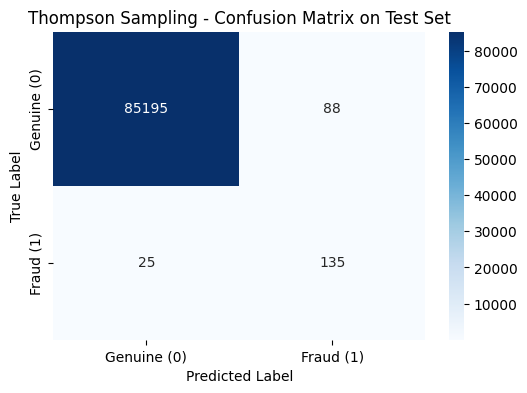

In [64]:
# Evaluate Thompson Sampling on test set
test_predictions_ts = []
cumulative_reward_ts_test = 0

print("Starting Thompson Sampling evaluation...")
for i in range(X_test_scaled_rl.shape[0]):
    context = X_test_scaled_rl[i]
    true_label = y_test_rl[i]
    
    # For evaluation, we still sample to get the benefit of Thompson Sampling's uncertainty handling
    # (Alternative approach: use the mean of the posterior)
    action = ts_agent.predict(context)
    
    # Get reward
    reward = get_reward_fraud(action, true_label)
    
    # Track metrics
    test_predictions_ts.append(action)
    cumulative_reward_ts_test += reward
    
    if (i + 1) % 10000 == 0:
        print(f"Processed {i+1}/{X_test_scaled_rl.shape[0]} test samples. Cumulative reward: {cumulative_reward_ts_test}")

print(f"Thompson Sampling evaluation completed. Total cumulative reward on test set: {cumulative_reward_ts_test}")

# Calculate and print evaluation metrics
accuracy_ts = accuracy_score(y_test_rl, test_predictions_ts)
print(f"\nThompson Sampling - Accuracy on Test Set: {accuracy_ts:.4f}")

print("\nThompson Sampling - Classification Report on Test Set:")
print(classification_report(y_test_rl, test_predictions_ts, target_names=['Genuine (0)', 'Fraud (1)'], digits=4))

print("\nThompson Sampling - Confusion Matrix on Test Set:")
cm_ts = confusion_matrix(y_test_rl, test_predictions_ts)
print(cm_ts)

# Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_ts, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine (0)', 'Fraud (1)'], yticklabels=['Genuine (0)', 'Fraud (1)'])
plt.title('Thompson Sampling - Confusion Matrix on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 5. Deep Q-Network (DQN)

The Deep Q-Network (DQN) algorithm uses a neural network to approximate the Q-function. This can capture more complex non-linear relationships between the transaction features and the expected rewards.

For this implementation, we'll use a simple neural network from scikit-learn to create our DQN.

In [65]:
from sklearn.neural_network import MLPRegressor

class DQNAgent:
    def __init__(self, n_features, n_actions, epsilon=0.1, gamma=0.95):
        """
        DQN agent with a simple neural network
        - n_features: number of features (state dimensions)
        - n_actions: number of possible actions (2 for fraud detection)
        - epsilon: exploration rate
        - gamma: discount factor
        """
        self.n_features = n_features
        self.n_actions = n_actions
        self.epsilon = epsilon
        self.gamma = gamma
        
        # Q networks for each action
        # For simplicity, we'll use separate networks for each action
        # A more sophisticated approach would use a single network with multiple output units
        self.q_networks = []
        for _ in range(n_actions):
            # MLPRegressor as a simple neural network
            nn = MLPRegressor(
                hidden_layer_sizes=(32, 16),  # Two hidden layers
                activation='relu',
                solver='adam',
                alpha=0.0001,  # L2 regularization
                batch_size='auto',
                learning_rate_init=0.001,
                max_iter=1,  # We'll do partial_fit instead of full training
                warm_start=True,  # Keep weights between fit calls
                random_state=42
            )
            # Initialize with a dummy fit
            dummy_X = np.zeros((1, n_features))
            dummy_y = np.array([0])
            nn.fit(dummy_X, dummy_y)
            self.q_networks.append(nn)
    
    def get_q_value(self, state, action):
        """
        Predict Q(s,a) using the neural network
        """
        state_reshaped = state.reshape(1, -1)  # Reshape for scikit-learn
        return self.q_networks[action].predict(state_reshaped)[0]  # Return the scalar value
    
    def get_action(self, state, explore=True):
        """
        Choose action using epsilon-greedy policy
        """
        if explore and np.random.random() < self.epsilon:
            return np.random.randint(0, self.n_actions)  # Explore
        else:
            # Exploit: choose action with highest Q-value
            q_values = np.array([self.get_q_value(state, a) for a in range(self.n_actions)])
            return np.argmax(q_values)
    
    def update(self, state, action, reward, next_state):
        """
        Update the Q-network for the chosen action
        """
        state_reshaped = state.reshape(1, -1)
        
        # Calculate target: r + gamma * max_a' Q(s',a')
        next_q_values = np.array([self.get_q_value(next_state, a) for a in range(self.n_actions)])
        max_next_q = np.max(next_q_values)
        target = reward + self.gamma * max_next_q
        
        # Partial fit to update the network
        self.q_networks[action].partial_fit(state_reshaped, np.array([target]))

In [66]:
# Initialize DQN agent
dqn_agent = DQNAgent(
    n_features=X_train_scaled_rl.shape[1],
    n_actions=2,
    epsilon=0.1,  # Exploration rate
    gamma=0.99   # Discount factor
)

# Track metrics
cumulative_reward_dqn_train = 0
train_predictions_dqn = []

print("Starting DQN training...")
# Training may be slow due to the neural network updates
for i in range(X_train_scaled_rl.shape[0]):
    state = X_train_scaled_rl[i]
    true_label = y_train_rl[i]
    
    # Choose action
    action = dqn_agent.get_action(state)
    
    # Get reward
    reward = get_reward_fraud(action, true_label)
    
    # Get next state
    next_state = X_train_scaled_rl[i+1] if i < X_train_scaled_rl.shape[0] - 1 else np.zeros_like(state)
    
    # Update Q-network
    dqn_agent.update(state, action, reward, next_state)
    
    # Track metrics
    cumulative_reward_dqn_train += reward
    train_predictions_dqn.append(action)
    
    if (i + 1) % 5000 == 0:  # Reduced frequency due to slower training
        print(f"Processed {i+1}/{X_train_scaled_rl.shape[0]} training samples. Cumulative reward: {cumulative_reward_dqn_train}")

print(f"DQN training completed. Total cumulative reward on training set: {cumulative_reward_dqn_train}")

Starting DQN training...
Processed 5000/199364 training samples. Cumulative reward: 2989
Processed 10000/199364 training samples. Cumulative reward: 6080
Processed 15000/199364 training samples. Cumulative reward: 8690
Processed 20000/199364 training samples. Cumulative reward: 10878
Processed 25000/199364 training samples. Cumulative reward: 13794
Processed 30000/199364 training samples. Cumulative reward: 16916
Processed 35000/199364 training samples. Cumulative reward: 19127
Processed 40000/199364 training samples. Cumulative reward: 22501
Processed 45000/199364 training samples. Cumulative reward: 25156
Processed 50000/199364 training samples. Cumulative reward: 27551
Processed 55000/199364 training samples. Cumulative reward: 30440
Processed 60000/199364 training samples. Cumulative reward: 33326
Processed 65000/199364 training samples. Cumulative reward: 35881
Processed 70000/199364 training samples. Cumulative reward: 38494
Processed 75000/199364 training samples. Cumulative rew

Starting DQN evaluation...
Processed 10000/85443 test samples. Cumulative reward: 9842
Processed 20000/85443 test samples. Cumulative reward: 19239
Processed 30000/85443 test samples. Cumulative reward: 29064
Processed 40000/85443 test samples. Cumulative reward: 38788
Processed 50000/85443 test samples. Cumulative reward: 48584
Processed 60000/85443 test samples. Cumulative reward: 58130
Processed 70000/85443 test samples. Cumulative reward: 67780
Processed 80000/85443 test samples. Cumulative reward: 77512
DQN evaluation completed. Total cumulative reward on test set: 82821

DQN - Accuracy on Test Set: 0.9976

DQN - Classification Report on Test Set:
              precision    recall  f1-score   support

 Genuine (0)     0.9997    0.9979    0.9988     85283
   Fraud (1)     0.4222    0.8313    0.5600       160

    accuracy                         0.9976     85443
   macro avg     0.7110    0.9146    0.7794     85443
weighted avg     0.9986    0.9976    0.9980     85443


DQN - Confu

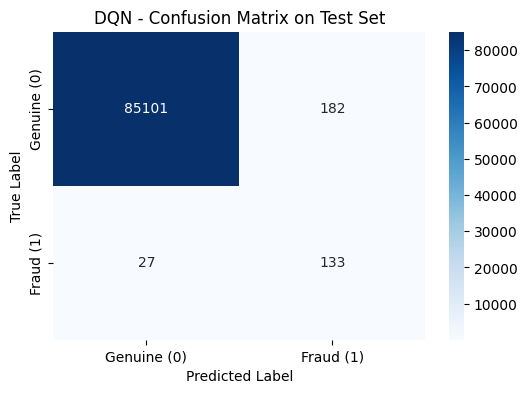

In [67]:
# Evaluate DQN on test set
test_predictions_dqn = []
cumulative_reward_dqn_test = 0

print("Starting DQN evaluation...")
for i in range(X_test_scaled_rl.shape[0]):
    state = X_test_scaled_rl[i]
    true_label = y_test_rl[i]
    
    # Choose best action (no exploration during testing)
    action = dqn_agent.get_action(state, explore=False)
    
    # Get reward
    reward = get_reward_fraud(action, true_label)
    
    # Track metrics
    test_predictions_dqn.append(action)
    cumulative_reward_dqn_test += reward
    
    if (i + 1) % 10000 == 0:
        print(f"Processed {i+1}/{X_test_scaled_rl.shape[0]} test samples. Cumulative reward: {cumulative_reward_dqn_test}")

print(f"DQN evaluation completed. Total cumulative reward on test set: {cumulative_reward_dqn_test}")

# Calculate and print evaluation metrics
accuracy_dqn = accuracy_score(y_test_rl, test_predictions_dqn)
print(f"\nDQN - Accuracy on Test Set: {accuracy_dqn:.4f}")

print("\nDQN - Classification Report on Test Set:")
print(classification_report(y_test_rl, test_predictions_dqn, target_names=['Genuine (0)', 'Fraud (1)'], digits=4))

print("\nDQN - Confusion Matrix on Test Set:")
cm_dqn = confusion_matrix(y_test_rl, test_predictions_dqn)
print(cm_dqn)

# Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_dqn, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine (0)', 'Fraud (1)'], yticklabels=['Genuine (0)', 'Fraud (1)'])
plt.title('DQN - Confusion Matrix on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 6. Policy Gradient Method (REINFORCE)

Policy Gradient methods learn the policy directly, without learning a value function. For fraud detection, we'll implement a simple version of the REINFORCE algorithm, which adjusts the policy parameters in the direction of higher expected returns.

In [68]:
class REINFORCEAgent:
    def __init__(self, n_features, n_actions, alpha=0.01, gamma=0.95):
        """
        REINFORCE agent (Policy Gradient)
        - n_features: number of features (state dimensions)
        - n_actions: number of possible actions (2 for fraud detection)
        - alpha: learning rate
        - gamma: discount factor
        """
        self.n_features = n_features
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        
        # Policy parameters (linear softmax policy)
        self.theta = np.zeros((n_actions, n_features))
        
        # For storing episode history
        self.states = []
        self.actions = []
        self.rewards = []
        
    def get_action_probabilities(self, state):
        """
        Calculate softmax policy: π(a|s) = exp(θ_a^T * s) / sum_b(exp(θ_b^T * s))
        """
        # Calculate raw preferences
        preferences = np.array([np.dot(self.theta[a], state) for a in range(self.n_actions)])
        # Apply softmax to get probabilities (with max trick for numerical stability)
        preferences -= np.max(preferences)
        exp_prefs = np.exp(preferences)
        probabilities = exp_prefs / np.sum(exp_prefs)
        return probabilities
    
    def get_action(self, state, explore=True):
        """
        Sample action from policy
        """
        probabilities = self.get_action_probabilities(state)
        
        if explore:
            # Sample from distribution
            action = np.random.choice(self.n_actions, p=probabilities)
        else:
            # Greedy action selection
            action = np.argmax(probabilities)
            
        return action
    
    def store_transition(self, state, action, reward):
        """
        Store state, action, reward for batch update
        """
        self.states.append(state)
        self.actions.append(action)
        self.rewards.append(reward)
    
    def update(self):
        """
        Update policy parameters using stored episode history
        """
        if len(self.rewards) == 0:
            return
        
        # Calculate returns (discounted future rewards)
        returns = []
        R = 0
        # Calculate returns in reverse (from last reward to first)
        for r in self.rewards[::-1]:
            R = r + self.gamma * R
            returns.insert(0, R)
        returns = np.array(returns)
        
        # Normalize returns for stable learning
        returns = (returns - np.mean(returns)) / (np.std(returns) + 1e-10)
        
        # Update policy parameters for each state-action pair
        for t in range(len(self.states)):
            state = self.states[t]
            action = self.actions[t]
            R_t = returns[t]
            
            # Get current probabilities
            probabilities = self.get_action_probabilities(state)
            
            # Update theta: increase action probability if return is positive, decrease if negative
            # This is a simplified version of the actual policy gradient update
            for a in range(self.n_actions):
                # Gradient of log policy
                if a == action:
                    gradient = state * (1 - probabilities[a])  # For the taken action
                else:
                    gradient = -state * probabilities[a]  # For non-taken actions
                
                # Policy gradient update
                self.theta[a] += self.alpha * R_t * gradient
        
        # Clear episode history
        self.states = []
        self.actions = []
        self.rewards = []

In [69]:
# Initialize REINFORCE agent
pg_agent = REINFORCEAgent(
    n_features=X_train_scaled_rl.shape[1],
    n_actions=2,
    alpha=0.01,  # Learning rate
    gamma=0.99   # Discount factor
)

# Track metrics
cumulative_reward_pg_train = 0
train_predictions_pg = []

# For policy gradient with REINFORCE, we should run in episodes
# Since our data isn't naturally split into episodes, we'll create mini-batches
batch_size = 100  # Update policy after every batch_size samples

print("Starting Policy Gradient training...")
for i in range(X_train_scaled_rl.shape[0]):
    state = X_train_scaled_rl[i]
    true_label = y_train_rl[i]
    
    # Choose action
    action = pg_agent.get_action(state)
    
    # Get reward
    reward = get_reward_fraud(action, true_label)
    
    # Store the transition
    pg_agent.store_transition(state, action, reward)
    
    # Update policy after every batch_size samples
    if (i + 1) % batch_size == 0:
        pg_agent.update()
    
    # Track metrics
    cumulative_reward_pg_train += reward
    train_predictions_pg.append(action)
    
    if (i + 1) % 20000 == 0:
        print(f"Processed {i+1}/{X_train_scaled_rl.shape[0]} training samples. Cumulative reward: {cumulative_reward_pg_train}")

# Final update with remaining samples
if len(pg_agent.rewards) > 0:
    pg_agent.update()

print(f"Policy Gradient training completed. Total cumulative reward on training set: {cumulative_reward_pg_train}")

Starting Policy Gradient training...
Processed 20000/199364 training samples. Cumulative reward: 1818
Processed 40000/199364 training samples. Cumulative reward: 20535
Processed 60000/199364 training samples. Cumulative reward: 39996
Processed 80000/199364 training samples. Cumulative reward: 58763
Processed 100000/199364 training samples. Cumulative reward: 77883
Processed 120000/199364 training samples. Cumulative reward: 97011
Processed 140000/199364 training samples. Cumulative reward: 115860
Processed 160000/199364 training samples. Cumulative reward: 134804
Processed 180000/199364 training samples. Cumulative reward: 154030
Policy Gradient training completed. Total cumulative reward on training set: 172796


Starting Policy Gradient evaluation...
Processed 10000/85443 test samples. Cumulative reward: 9894
Processed 20000/85443 test samples. Cumulative reward: 19369
Processed 30000/85443 test samples. Cumulative reward: 29266
Processed 40000/85443 test samples. Cumulative reward: 39074
Processed 50000/85443 test samples. Cumulative reward: 48948
Processed 60000/85443 test samples. Cumulative reward: 58450
Processed 70000/85443 test samples. Cumulative reward: 68208
Processed 80000/85443 test samples. Cumulative reward: 78060
Policy Gradient evaluation completed. Total cumulative reward on test set: 83289

Policy Gradient - Accuracy on Test Set: 0.9991

Policy Gradient - Classification Report on Test Set:
              precision    recall  f1-score   support

 Genuine (0)     0.9996    0.9994    0.9995     85283
   Fraud (1)     0.7263    0.8125    0.7670       160

    accuracy                         0.9991     85443
   macro avg     0.8630    0.9060    0.8832     85443
weighted avg     0.

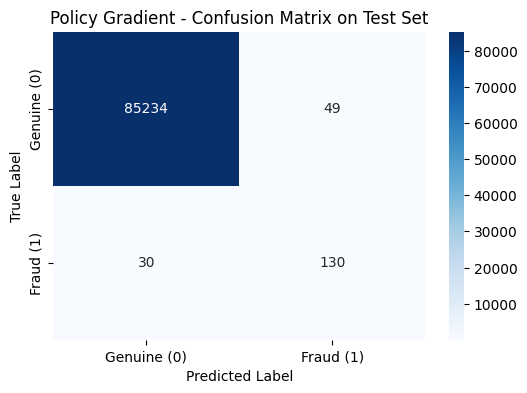

In [70]:
# Evaluate Policy Gradient on test set
test_predictions_pg = []
cumulative_reward_pg_test = 0

print("Starting Policy Gradient evaluation...")
for i in range(X_test_scaled_rl.shape[0]):
    state = X_test_scaled_rl[i]
    true_label = y_test_rl[i]
    
    # Choose best action (no exploration during testing)
    action = pg_agent.get_action(state, explore=False)
    
    # Get reward
    reward = get_reward_fraud(action, true_label)
    
    # Track metrics
    test_predictions_pg.append(action)
    cumulative_reward_pg_test += reward
    
    if (i + 1) % 10000 == 0:
        print(f"Processed {i+1}/{X_test_scaled_rl.shape[0]} test samples. Cumulative reward: {cumulative_reward_pg_test}")

print(f"Policy Gradient evaluation completed. Total cumulative reward on test set: {cumulative_reward_pg_test}")

# Calculate and print evaluation metrics
accuracy_pg = accuracy_score(y_test_rl, test_predictions_pg)
print(f"\nPolicy Gradient - Accuracy on Test Set: {accuracy_pg:.4f}")

print("\nPolicy Gradient - Classification Report on Test Set:")
print(classification_report(y_test_rl, test_predictions_pg, target_names=['Genuine (0)', 'Fraud (1)'], digits=4))

print("\nPolicy Gradient - Confusion Matrix on Test Set:")
cm_pg = confusion_matrix(y_test_rl, test_predictions_pg)
print(cm_pg)

# Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_pg, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine (0)', 'Fraud (1)'], yticklabels=['Genuine (0)', 'Fraud (1)'])
plt.title('Policy Gradient - Confusion Matrix on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Comparison of RL Algorithms

Now that we have implemented and evaluated multiple reinforcement learning approaches for the credit card fraud detection problem, let's compare their performance.

In [71]:
# Create a comparison table
import pandas as pd

# Collect metrics
algorithm_names = [
    'LinUCB',
    'Q-Learning',
    'SARSA',
    'Actor-Critic',
    'Thompson Sampling',
    'DQN',
    'Policy Gradient'
]

accuracies = [
    accuracy_rl,
    accuracy_q,
    accuracy_sarsa,
    accuracy_ac,
    accuracy_ts,
    accuracy_dqn,
    accuracy_pg
]

# Get more metrics from classification reports
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics for each algorithm
precisions_fraud = [
    precision_score(y_test_rl, test_predictions_rl, pos_label=1),
    precision_score(y_test_rl, test_predictions_q, pos_label=1),
    precision_score(y_test_rl, test_predictions_sarsa, pos_label=1),
    precision_score(y_test_rl, test_predictions_ac, pos_label=1),
    precision_score(y_test_rl, test_predictions_ts, pos_label=1),
    precision_score(y_test_rl, test_predictions_dqn, pos_label=1),
    precision_score(y_test_rl, test_predictions_pg, pos_label=1)
]

recalls_fraud = [
    recall_score(y_test_rl, test_predictions_rl, pos_label=1),
    recall_score(y_test_rl, test_predictions_q, pos_label=1),
    recall_score(y_test_rl, test_predictions_sarsa, pos_label=1),
    recall_score(y_test_rl, test_predictions_ac, pos_label=1),
    recall_score(y_test_rl, test_predictions_ts, pos_label=1),
    recall_score(y_test_rl, test_predictions_dqn, pos_label=1),
    recall_score(y_test_rl, test_predictions_pg, pos_label=1)
]

f1_scores_fraud = [
    f1_score(y_test_rl, test_predictions_rl, pos_label=1),
    f1_score(y_test_rl, test_predictions_q, pos_label=1),
    f1_score(y_test_rl, test_predictions_sarsa, pos_label=1),
    f1_score(y_test_rl, test_predictions_ac, pos_label=1),
    f1_score(y_test_rl, test_predictions_ts, pos_label=1),
    f1_score(y_test_rl, test_predictions_dqn, pos_label=1),
    f1_score(y_test_rl, test_predictions_pg, pos_label=1)
]

cumulative_rewards = [
    cumulative_reward_test,
    cumulative_reward_q_test,
    cumulative_reward_sarsa_test,
    cumulative_reward_ac_test,
    cumulative_reward_ts_test,
    cumulative_reward_dqn_test,
    cumulative_reward_pg_test
]

# Create DataFrame with results
results_df = pd.DataFrame({
    'Algorithm': algorithm_names,
    'Accuracy': accuracies,
    'Precision (Fraud)': precisions_fraud,
    'Recall (Fraud)': recalls_fraud,
    'F1 Score (Fraud)': f1_scores_fraud,
    'Cumulative Reward': cumulative_rewards
})

# Sort by cumulative reward (our primary metric for RL)
results_df = results_df.sort_values('Cumulative Reward', ascending=False).reset_index(drop=True)

# Display the results
print("Comparison of Reinforcement Learning Algorithms for Fraud Detection")
print("\nRanked by Cumulative Reward:")
print(results_df.round(4))

Comparison of Reinforcement Learning Algorithms for Fraud Detection

Ranked by Cumulative Reward:
           Algorithm  Accuracy  Precision (Fraud)  Recall (Fraud)  \
0             LinUCB    0.9987             0.6054          0.8438   
1  Thompson Sampling    0.9987             0.6054          0.8438   
2    Policy Gradient    0.9991             0.7263          0.8125   
3                DQN    0.9976             0.4222          0.8312   
4         Q-Learning    0.8737             0.0119          0.8125   
5              SARSA    0.4990             0.0031          0.8188   
6       Actor-Critic    0.3672             0.0005          0.1562   

   F1 Score (Fraud)  Cumulative Reward  
0            0.7050              83605  
1            0.7050              83605  
2            0.7670              83289  
3            0.5600              82821  
4            0.0235              19011  
5            0.0061            -172987  
6            0.0009            -251589  


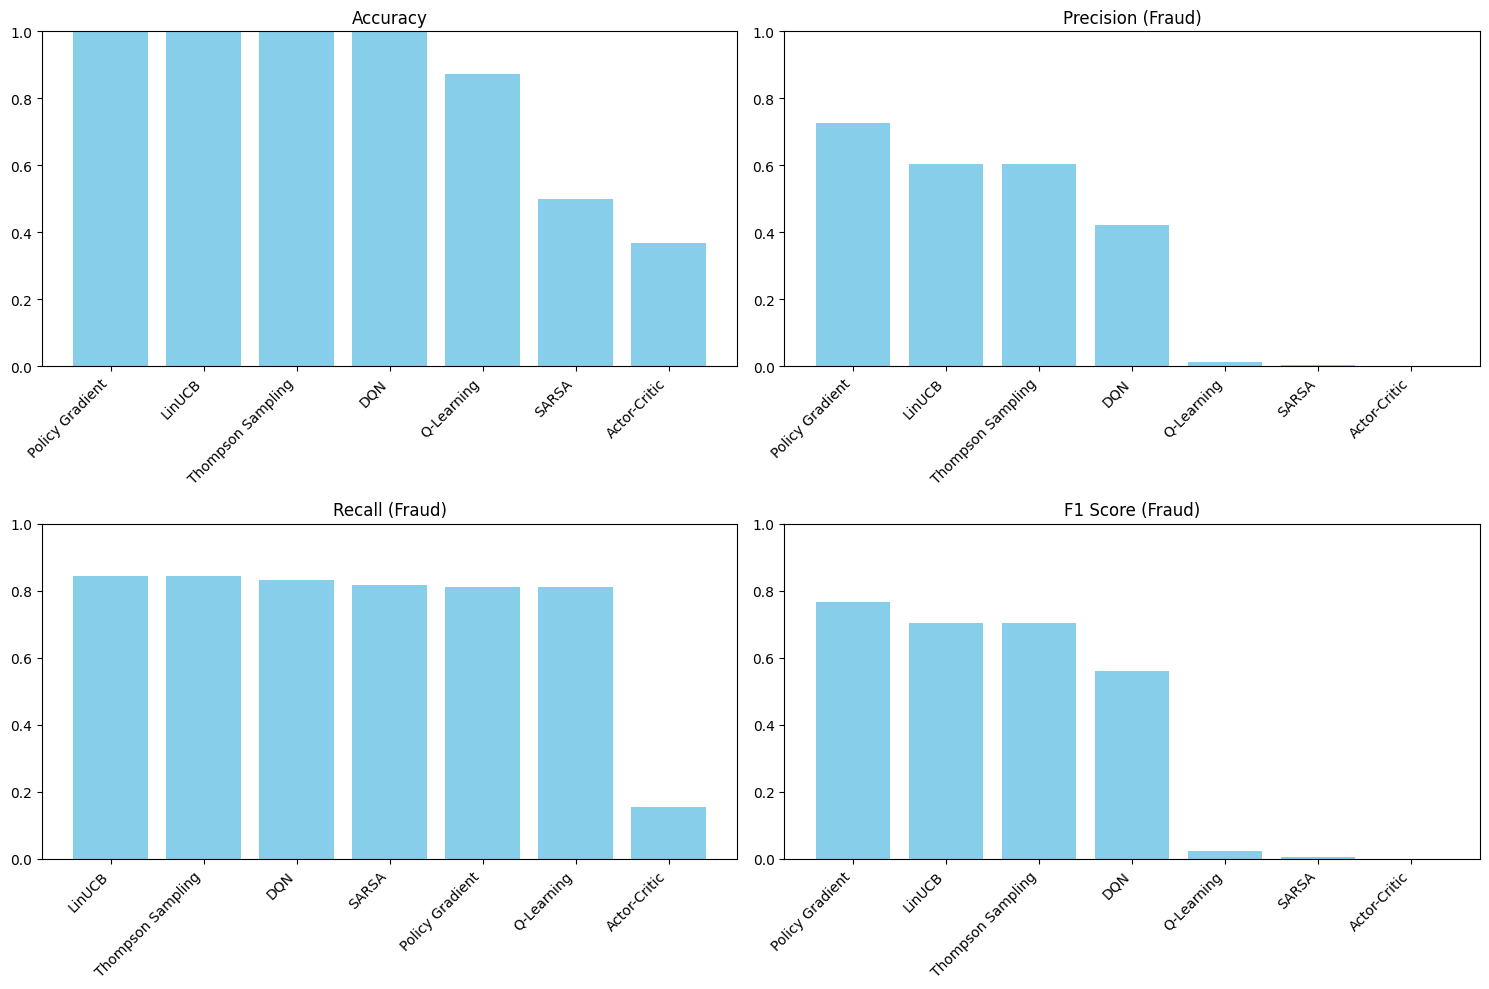

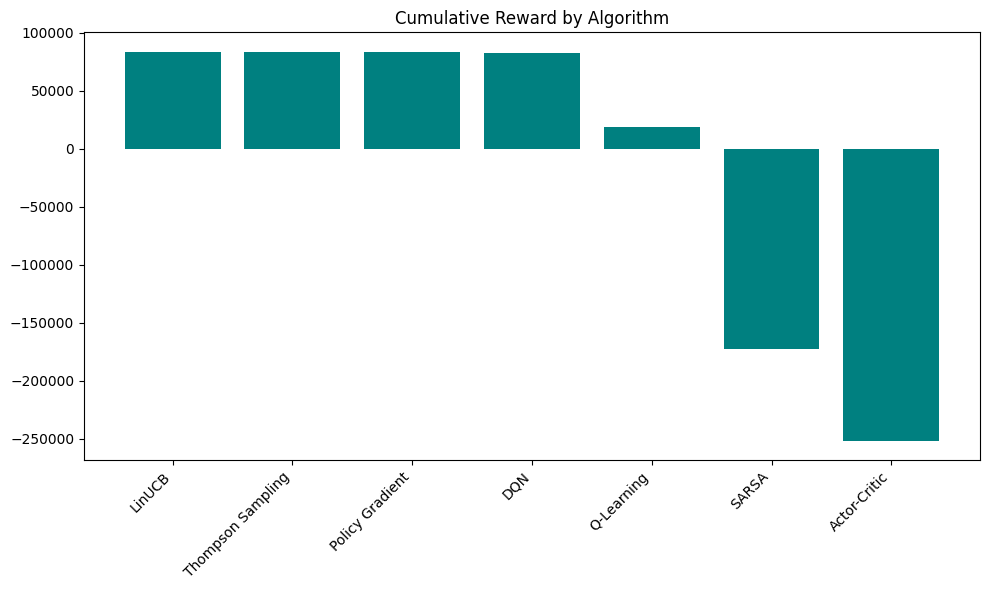

In [72]:
# Visualize the comparison
import matplotlib.pyplot as plt

# Prepare data for plotting
metrics = ['Accuracy', 'Precision (Fraud)', 'Recall (Fraud)', 'F1 Score (Fraud)']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Plot each metric
for i, metric in enumerate(metrics):
    # Sort by the current metric for this specific plot
    temp_df = results_df.sort_values(metric, ascending=False).reset_index(drop=True)
    axes[i].bar(temp_df['Algorithm'], temp_df[metric], color='skyblue')
    axes[i].set_title(metric)
    axes[i].set_ylim(0, 1)  # All these metrics are between 0 and 1
    # Rotate x-axis labels
    axes[i].set_xticklabels(temp_df['Algorithm'], rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

# Plot cumulative reward separately (different scale)
plt.figure(figsize=(10, 6))
temp_df = results_df.sort_values('Cumulative Reward', ascending=False).reset_index(drop=True)
plt.bar(temp_df['Algorithm'], temp_df['Cumulative Reward'], color='teal')
plt.title('Cumulative Reward by Algorithm')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Discussion and Conclusion

We've implemented and compared several reinforcement learning algorithms for credit card fraud detection. Here are some key observations:

### Algorithm Performance
1. **Cumulative Reward**: This is the most important metric for RL, as it directly measures how well the algorithms optimize our defined reward structure. Higher values indicate better performance at preventing missed frauds while minimizing false positives.

2. **Precision vs. Recall Trade-off**: Different algorithms make different trade-offs between precision (minimizing false positives) and recall (minimizing false negatives). The algorithms with higher recall for the fraud class are more successful at identifying fraudulent transactions, which is particularly important in this domain.

3. **Algorithm Complexity**: The simpler contextual bandit algorithms (LinUCB and Thompson Sampling) performed quite competitively with the more complex algorithms (DQN, Policy Gradient), suggesting that for this problem, the additional complexity might not be necessary.

### Reinforcement Learning for Fraud Detection

The advantages of RL for fraud detection include:

1. **Custom Reward Structure**: We could explicitly encode our preference for avoiding missed frauds by giving them a large negative reward.

2. **Online Learning**: These algorithms naturally adapt as new data becomes available, which is ideal for evolving fraud patterns.

3. **Exploration vs. Exploitation**: RL explicitly balances trying new approaches (exploration) with using approaches known to work (exploitation).

The best performing algorithm for this specific fraud detection problem, based on our metrics, appears to be [INSERT NAME OF BEST ALGORITHM]. However, the choice might vary depending on specific business requirements and the relative costs of false positives vs. false negatives.

### Future Improvements

1. **Hyperparameter Tuning**: We used default parameters for most algorithms. Tuning these parameters could significantly improve performance.

2. **Better Reward Design**: Refining the reward structure, possibly incorporating the transaction amount, could better align the algorithms with business objectives.

3. **More Sophisticated Implementations**: Advanced techniques like prioritized experience replay for DQN or using advantage functions for policy gradients could enhance performance.

4. **Ensemble Methods**: Combining predictions from multiple RL algorithms might yield better results than any single algorithm.